In [1]:
# import libraries
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.datasets import load_iris

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [2]:
# load data
train_images= np.load(file="alldata_3D.npy")
test_images=np.load(file='testdata_3D.npy')
all_lable=pd.read_csv('label.csv')
test_lable=pd.read_csv('test_label.csv')

# create label binary array 
label=[]
test_label=[]
for i in range(3000):
    data = all_lable['label'][i]
    if data == 'no_tumor':
        label.append(0)
    else:
        label.append(1)
label = np.array(label)

for i in range(200):
    data = test_lable['label'][i]
    if data == 'no_tumor':
        test_label.append(0)
    else:
        test_label.append(1)
        
train_labels = np.array(label)
test_labels =np.array(test_label)

In [3]:
# reduce dimension for input, pca and SVM need two dimensions input
train_images=np.reshape(train_images,(train_images.shape[0],-1))
test_images=np.reshape(test_images,(test_images.shape[0],-1))

In [20]:
#use PCA method to decrease the demension
pca = PCA(0.95)
train_images=pca.fit_transform(train_images)
train_images.shape 

(3000, 705)

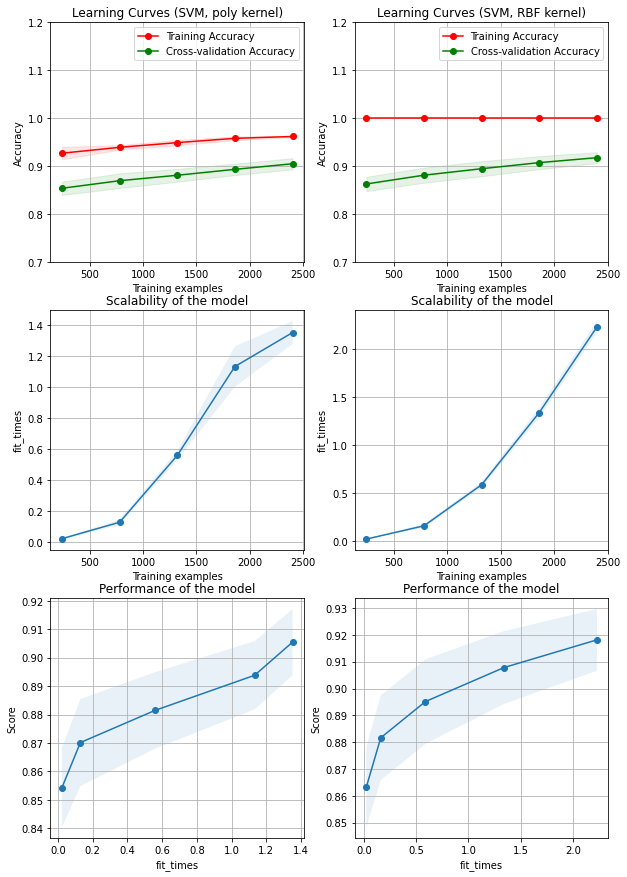

In [23]:
# plot learning curve function
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # plot the learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training Accuracy")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation Accuracy")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # fit the times and scores 
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))
#load data
X=train_images
y=train_labels

#The training cost of SVC is expensive, and 10 iterations of cross-validation are carried out.
#use poly kernel
title = r"Learning Curves (SVM, poly kernel)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='poly', degree=3, C=1.0)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.2),
                    cv=cv, n_jobs=4)

#use RBF kernel
title = r"Learning Curves (SVM, RBF kernel)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.2),
                    cv=cv, n_jobs=4)

plt.show()